# ML Assignment 1: Uber ride Fares

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading and understanding the data

In [50]:
df = pd.read_csv('uber.csv')

In [51]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [52]:
df.shape

(200000, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [54]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### 3. Handling Missing Values

In [55]:
df.dropna(inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


#### 4. Adding and removing columns

In [57]:
df.head(2)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1


In [58]:
drop = ['Unnamed: 0', 'key']
df.drop(drop, axis=1, inplace=True)

In [59]:
df.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1


Breaking down columns 

In [60]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

df = df.assign(hour = df.pickup_datetime.dt.hour, 
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [61]:
df = df.drop('pickup_datetime', axis=1)

In [62]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


### 5. Handling Outliers

fare_amount             AxesSubplot(0.125,0.749828;0.168478x0.130172)
pickup_longitude     AxesSubplot(0.327174,0.749828;0.168478x0.130172)
pickup_latitude      AxesSubplot(0.529348,0.749828;0.168478x0.130172)
dropoff_longitude    AxesSubplot(0.731522,0.749828;0.168478x0.130172)
dropoff_latitude        AxesSubplot(0.125,0.593621;0.168478x0.130172)
passenger_count      AxesSubplot(0.327174,0.593621;0.168478x0.130172)
hour                 AxesSubplot(0.529348,0.593621;0.168478x0.130172)
day                  AxesSubplot(0.731522,0.593621;0.168478x0.130172)
month                   AxesSubplot(0.125,0.437414;0.168478x0.130172)
year                 AxesSubplot(0.327174,0.437414;0.168478x0.130172)
dayofweek            AxesSubplot(0.529348,0.437414;0.168478x0.130172)
dtype: object

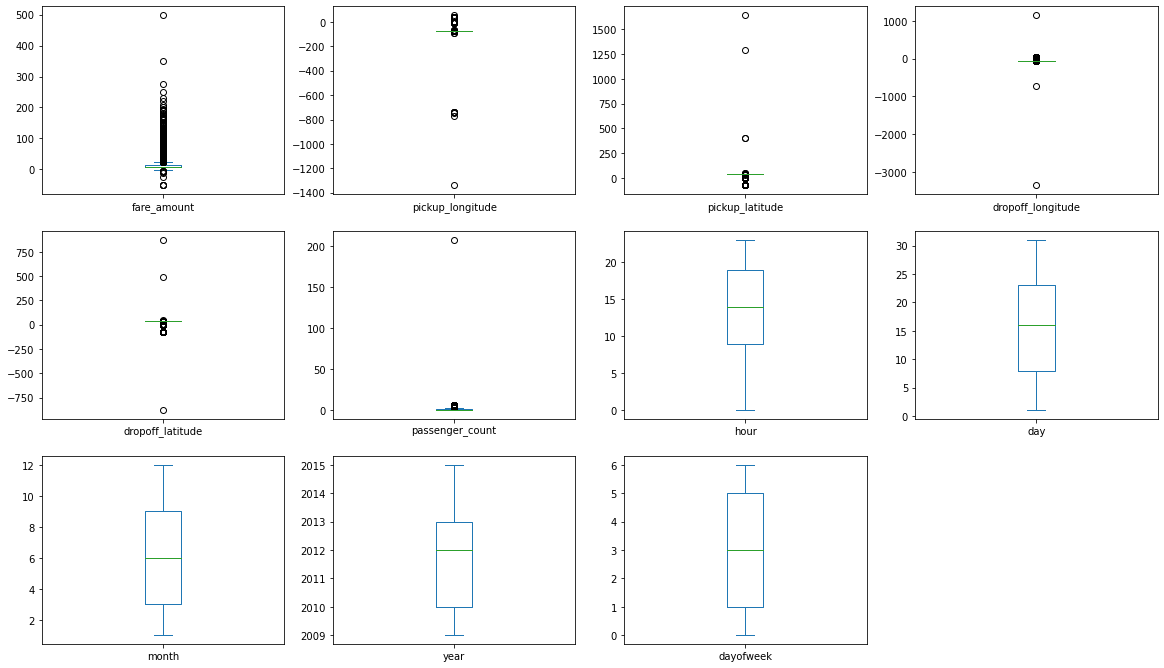

In [63]:
df.plot(kind='box', subplots=True, layout=(5,4), figsize=(20,20))

In [64]:
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    
    df[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_all_outliers(df1, col_list):
    for i in col_list:
        df1 = remove_outlier(df, i)
    return df1

In [65]:
df_new = treat_all_outliers(df, df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.749828;0.168478x0.130172)
pickup_longitude     AxesSubplot(0.327174,0.749828;0.168478x0.130172)
pickup_latitude      AxesSubplot(0.529348,0.749828;0.168478x0.130172)
dropoff_longitude    AxesSubplot(0.731522,0.749828;0.168478x0.130172)
dropoff_latitude        AxesSubplot(0.125,0.593621;0.168478x0.130172)
passenger_count      AxesSubplot(0.327174,0.593621;0.168478x0.130172)
hour                 AxesSubplot(0.529348,0.593621;0.168478x0.130172)
day                  AxesSubplot(0.731522,0.593621;0.168478x0.130172)
month                   AxesSubplot(0.125,0.437414;0.168478x0.130172)
year                 AxesSubplot(0.327174,0.437414;0.168478x0.130172)
dayofweek            AxesSubplot(0.529348,0.437414;0.168478x0.130172)
dtype: object

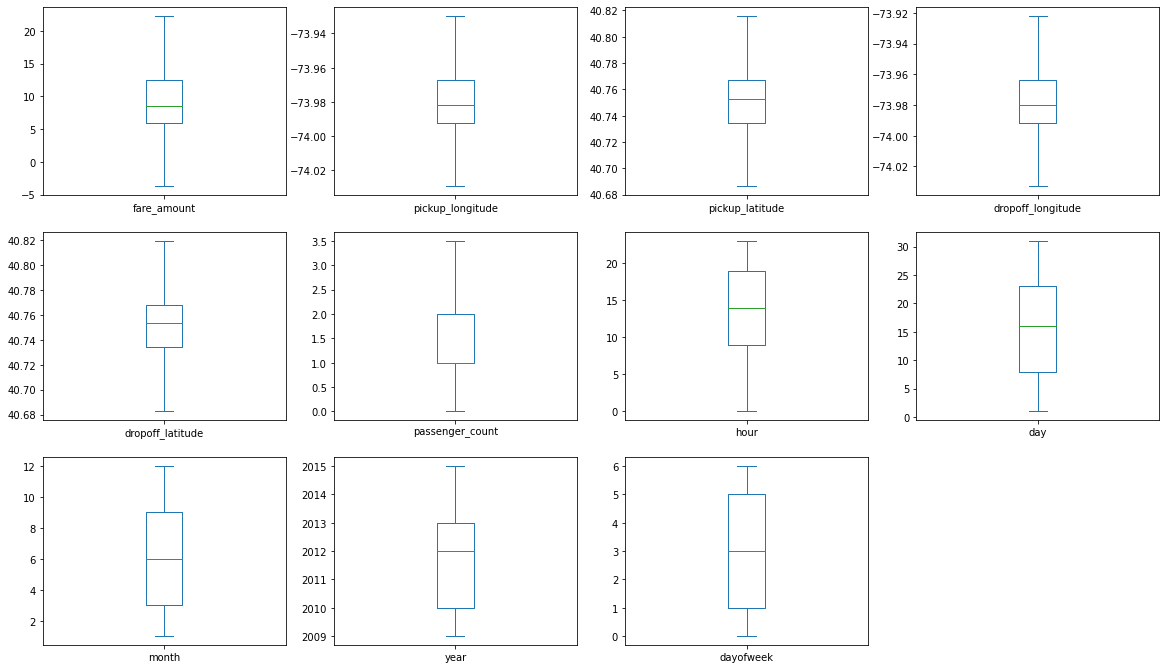

In [66]:
df.plot(kind='box', subplots=True, layout=(5,4), figsize=(20,20))

### 6. Adding the distance column

In [67]:
#!pip install haversine

In [68]:
import haversine as hs
df.reset_index(inplace = True,drop = True)
travel_dist = []
for i in range(len(df['pickup_longitude'])):
    long1 = df['pickup_longitude'][i]
    long2 = df['dropoff_longitude'][i]
    lati1 = df['pickup_latitude'][i]
    lati2 = df['dropoff_latitude'][i]
    
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    
    dist = hs.haversine(loc1, loc2)
    travel_dist.append(dist)

print(travel_dist)
df['dist_treavel_km'] = travel_dist
df.head()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_treavel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.115995


In [69]:
df.shape

(199999, 12)

### 7. Splitting the dataset into training and test sets

In [73]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_treavel_km'],
      dtype='object')

In [80]:
x = df[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_treavel_km']].values

y = df['fare_amount'].values

In [81]:
print(x)

[[-7.39998169e+01  4.07383537e+01 -7.39995117e+01 ...  2.01500000e+03
   3.00000000e+00  1.68332508e+00]
 [-7.39943550e+01  4.07282250e+01 -7.39947100e+01 ...  2.00900000e+03
   4.00000000e+00  2.45759328e+00]
 [-7.40050430e+01  4.07407700e+01 -7.39625650e+01 ...  2.00900000e+03
   0.00000000e+00  5.03638415e+00]
 ...
 [-7.39860170e+01  4.07564870e+01 -7.39220357e+01 ...  2.00900000e+03
   0.00000000e+00  8.91935443e+00]
 [-7.39971237e+01  4.07254524e+01 -7.39832153e+01 ...  2.01500000e+03
   2.00000000e+00  3.53972034e+00]
 [-7.39843950e+01  4.07200770e+01 -7.39855080e+01 ...  2.01000000e+03
   5.00000000e+00  5.41779096e+00]]


In [82]:
print(y)

[ 7.5   7.7  12.9  ... 22.25 14.5  14.1 ]


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [84]:
print(X_train)

[[-7.39956380e+01  4.07283530e+01 -7.39997920e+01 ...  2.01200000e+03
   2.00000000e+00  7.74860962e-01]
 [-7.39588470e+01  4.07121100e+01 -7.39822500e+01 ...  2.01300000e+03
   4.00000000e+00  2.36125696e+00]
 [-7.39668810e+01  4.07701780e+01 -7.39529720e+01 ...  2.01200000e+03
   2.00000000e+00  6.36135688e+00]
 ...
 [-7.39870950e+01  4.07180230e+01 -7.39451180e+01 ...  2.00900000e+03
   4.00000000e+00  3.70106429e+00]
 [-7.39886130e+01  4.07557730e+01 -7.39785510e+01 ...  2.01000000e+03
   2.00000000e+00  1.32278316e+00]
 [-7.39906640e+01  4.07510250e+01 -7.39220357e+01 ...  2.01000000e+03
   1.00000000e+00  9.53768516e+00]]


In [85]:
print(X_test)

[[-7.40013230e+01  4.07516160e+01 -7.39873270e+01 ...  2.01000000e+03
   2.00000000e+00  2.09854468e+00]
 [-7.39816240e+01  4.07807130e+01 -7.39904450e+01 ...  2.01200000e+03
   6.00000000e+00  9.60294558e-01]
 [-7.39855400e+01  4.07272400e+01 -7.39905380e+01 ...  2.01400000e+03
   5.00000000e+00  3.37776733e+00]
 ...
 [-7.39797510e+01  4.07351010e+01 -7.39881320e+01 ...  2.00900000e+03
   6.00000000e+00  7.82713323e-01]
 [-7.40078920e+01  4.07336250e+01 -7.40072650e+01 ...  2.01300000e+03
   2.00000000e+00  5.29730863e-02]
 [-7.39893860e+01  4.07262830e+01 -7.39937960e+01 ...  2.01000000e+03
   6.00000000e+00  8.70773423e-01]]


In [86]:
print(y_train)

[ 4.1   9.   22.25 ...  8.5   5.7  22.25]


In [87]:
print(y_test)

[ 6.5  4.1 12.  ...  4.1 14.   4.1]


### 8. Implementing Linear Regression 

In [88]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = model.predict(X_test)

### 9. Calculating Performance

In [93]:
from sklearn.metrics import r2_score, mean_squared_error

print('r2_score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score:  0.6548390645534896
MSE:  10.218644490168607
RMSE:  3.196661460049939
